In [16]:
import pandas as pd
import numpy as np
import os
import sys

#https://www.kaggle.com/jeffd23/the-nature-conservancy-fisheries-monitoring/deep-learning-in-the-deep-blue-lb-1-279
#https://www.kaggle.com/narae78/the-nature-conservancy-fisheries-monitoring/fish-detection
#https://www.kaggle.com/andrelopes1705/the-nature-conservancy-fisheries-monitoring/lasagne-based-of-zfturbo-keras-code/code
#https://www.youtube.com/watch?v=qIUh3CEeTqg
#https://medium.com/@ageitgey/machine-learning-is-fun-part-3-deep-learning-and-convolutional-neural-networks-f40359318721#.f8uh9jgiu
#http://blog.xebia.fr/2017/03/01/tensorflow-deep-learning-episode-1-introduction/
#http://cs231n.github.io/neural-networks-3/

In [18]:
TRAIN_PATH = './data/train'

In [20]:
def listFiles():
    map_dir_files = {}
    for d in os.listdir(TRAIN_PATH):
        d = os.path.join(TRAIN_PATH,d)
        if os.path.isdir(d):
            files = os.listdir(d)
            map_dir_files [d] = files
            sys.stderr.writelines("Nb files for %s: %d \n" % (d, len(files)))
    return map_dir_files

In [22]:
%time map_dir_files = listFiles()

Wall time: 26 ms


Nb files for ./data/train\ALB: 1719 
Nb files for ./data/train\BET: 200 
Nb files for ./data/train\DOL: 117 
Nb files for ./data/train\LAG: 67 
Nb files for ./data/train\NoF: 465 
Nb files for ./data/train\OTHER: 299 
Nb files for ./data/train\SHARK: 176 
Nb files for ./data/train\YFT: 734 


In [24]:
from PIL import Image
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [26]:
def plot_graph(fish, nbfiles, nbcolumns, is_random = True):
    files = os.listdir(fish)
    nblines = int(nbfiles / nbcolumns)
    fig, ax = plt.subplots(nrows=nblines, ncols=nbcolumns, figsize=(15,15))
    ax = ax.flatten()
   
    for i in range(0,nbfiles):
        f = random.choice(files) if is_random else files[i]
        img = Image.open(os.path.join(fish,f))
        ax[i].imshow(img)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title("%s h:%s w:%s" % (f, img.height,img.width))
    plt.tight_layout()

Wall time: 2.96 s


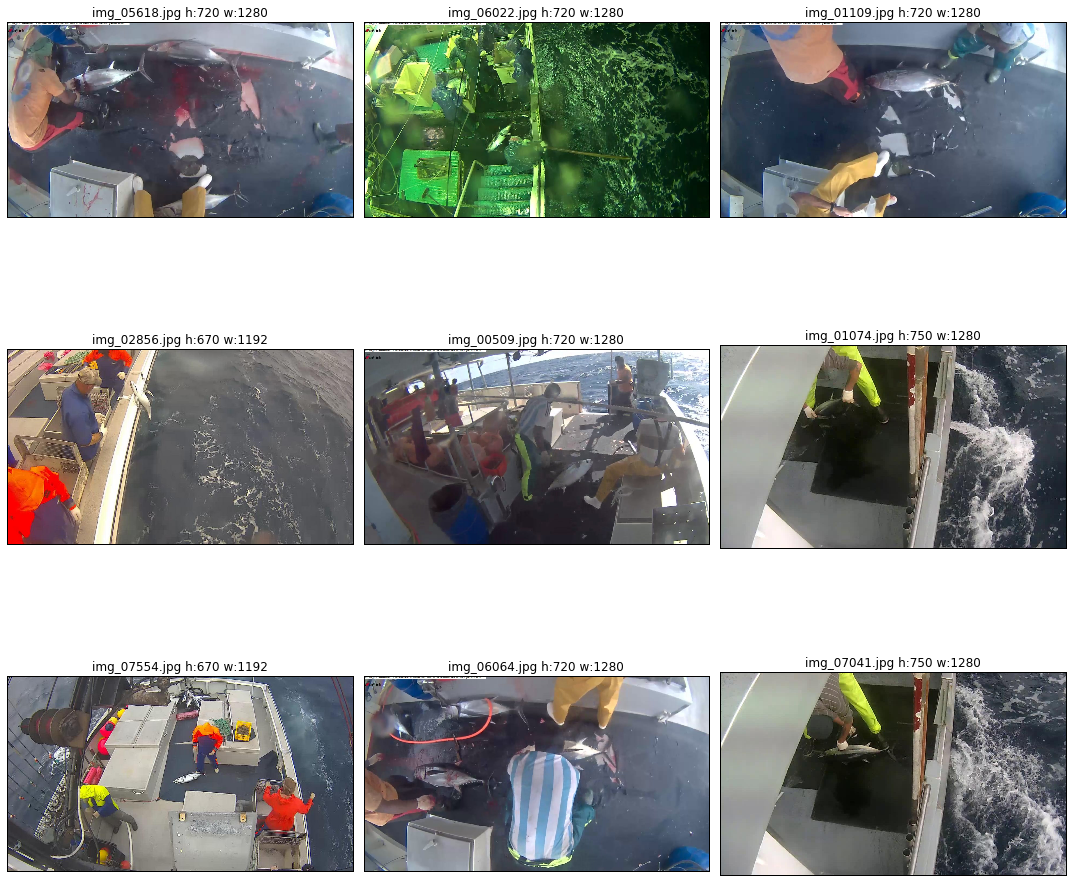

In [28]:
%time plot_graph(os.path.join(TRAIN_PATH,'ALB'), 9, 3 )

Wall time: 2.58 s


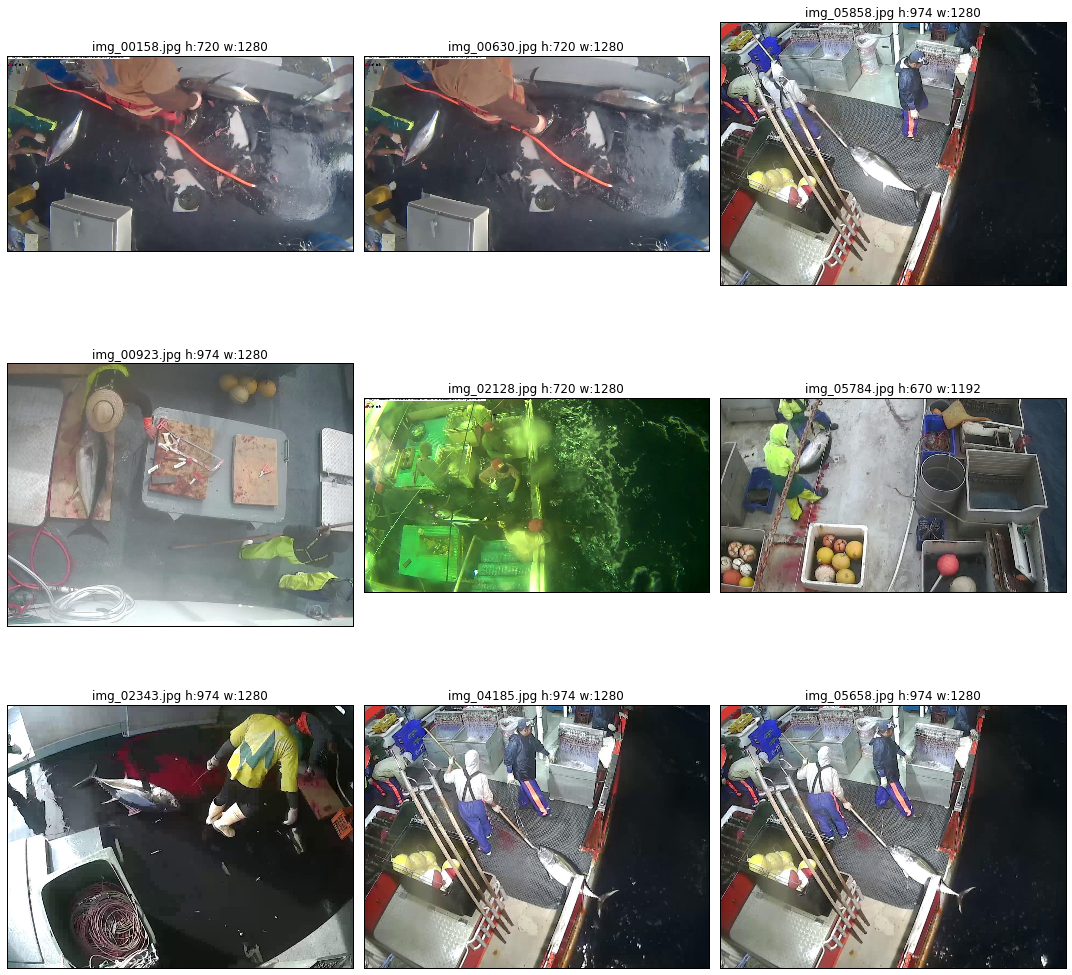

In [30]:
%time plot_graph(os.path.join(TRAIN_PATH,'BET'), 9, 3 )

Wall time: 2.24 s


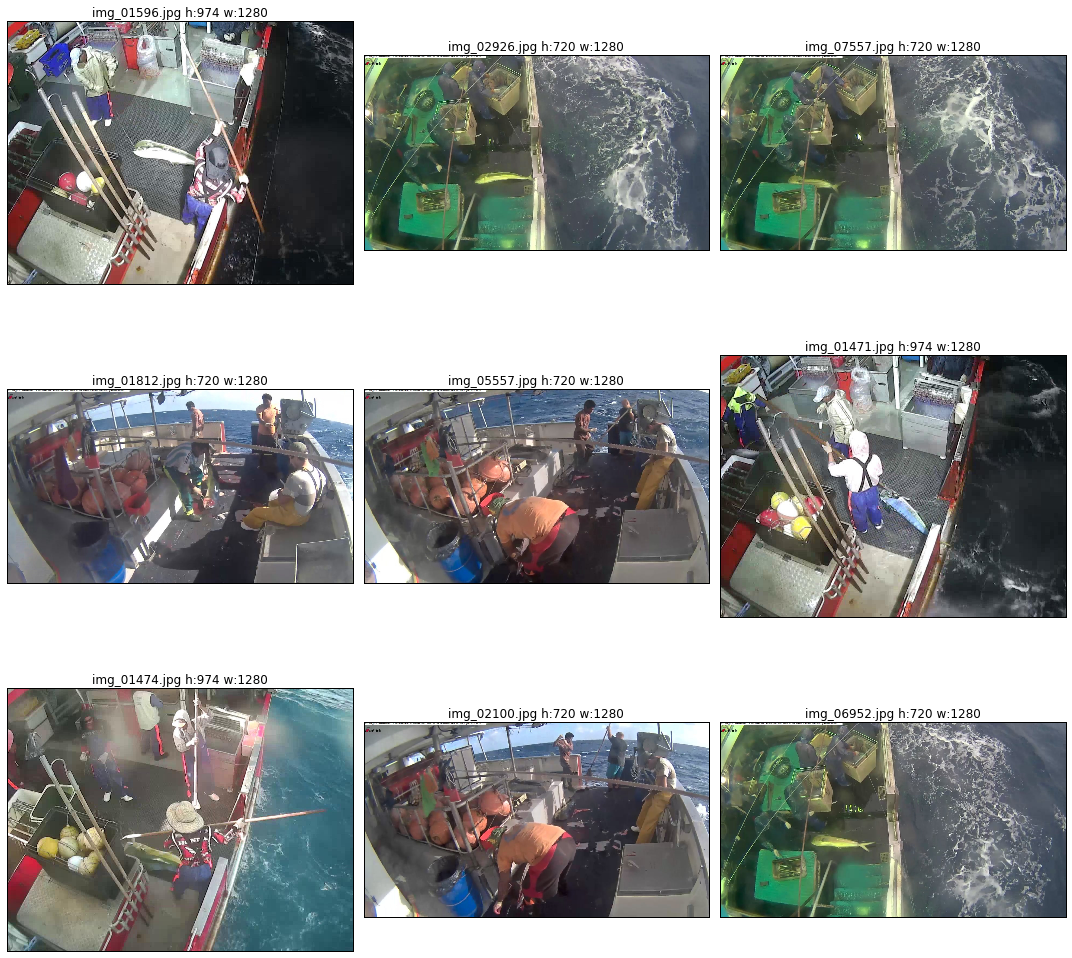

In [32]:
%time plot_graph(os.path.join(TRAIN_PATH,'DOL'), 9, 3 )

Wall time: 2.37 s


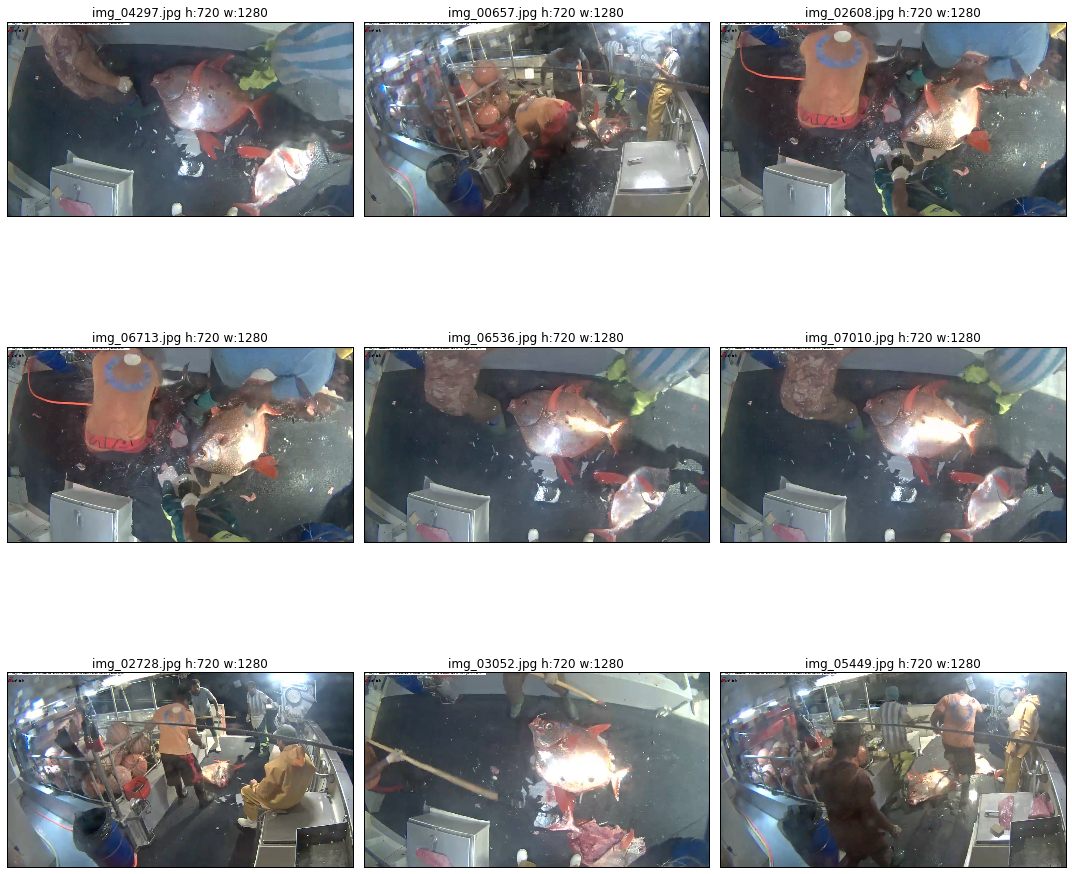

In [34]:
%time plot_graph(os.path.join(TRAIN_PATH,'LAG'), 9, 3 )

Wall time: 5.38 s


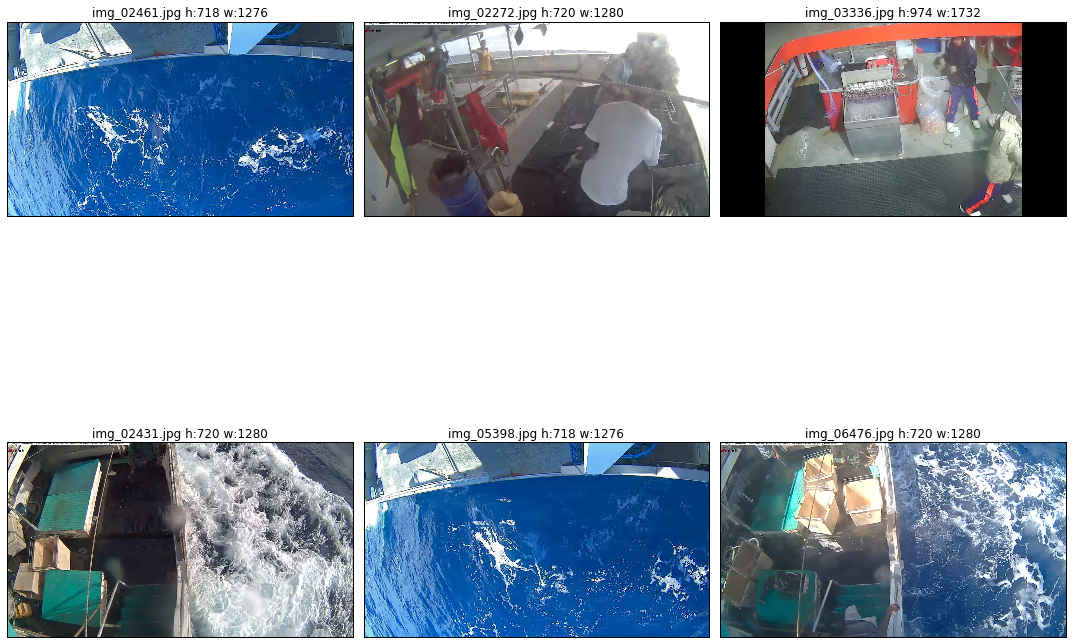

In [36]:
%time plot_graph(os.path.join(TRAIN_PATH,'Nof'),6, 3 )

In [38]:
def get_all_files(root_dir):
    list_files = []
    for root, subdirs, files in os.walk(root_dir):
            list_files.extend([os.path.join(root,f) for f in files])
    return list_files

In [40]:
%time list_files = get_all_files(TRAIN_PATH)
list_files[:10]

Wall time: 4.89 s


['./data/train\\ALB\\img_00003.jpg',
 './data/train\\ALB\\img_00010.jpg',
 './data/train\\ALB\\img_00012.jpg',
 './data/train\\ALB\\img_00015.jpg',
 './data/train\\ALB\\img_00019.jpg',
 './data/train\\ALB\\img_00020.jpg',
 './data/train\\ALB\\img_00029.jpg',
 './data/train\\ALB\\img_00032.jpg',
 './data/train\\ALB\\img_00037.jpg',
 './data/train\\ALB\\img_00038.jpg']

In [42]:
np_files = np.array(list_files)
%time shapes = [Image.open(f).size for f in list_files]

Wall time: 1min 56s


In [44]:
import pandas as pd

In [46]:
pd.Series(shapes).value_counts()

(128, 128, 3)    3777
dtype: int64

## Data split

In [47]:
#conda install -c https://conda.binstar.org/menpo opencv3
import cv2
print (cv2.__version__)

3.1.0


In [48]:
N_COLS = 128
N_ROWS = 128

In [49]:
def build_X_y(files, COLS = 160, ROWS = 90,  CHANNELS =3):
    X = np.ndarray((len(files), ROWS, COLS, CHANNELS), dtype = np.float32)
    y = []
    
    for i,im in enumerate(files):
        fish = str.split(os.path.dirname(im), os.sep)[-1]
        if i%500 == 0:
            sys.stderr.writelines("file:%s y:%s  %d/%d \n" % (im.title(), fish, i ,len(files)))
            sys.stderr.flush()
        
        im = cv2.imread(im,cv2.IMREAD_COLOR)
        X[i] = cv2.resize(im, (COLS,ROWS), interpolation=cv2.INTER_CUBIC)
        y.append(fish)
    return X,y

In [50]:
%time X,y = build_X_y(list_files, COLS = N_COLS, ROWS = N_ROWS)

file:./Data/Train\Alb\Img_00003.Jpg y:ALB  0/3777 
file:./Data/Train\Alb\Img_02263.Jpg y:ALB  500/3777 
file:./Data/Train\Alb\Img_04683.Jpg y:ALB  1000/3777 
file:./Data/Train\Alb\Img_07078.Jpg y:ALB  1500/3777 
file:./Data/Train\Dol\Img_05446.Jpg y:DOL  2000/3777 
file:./Data/Train\Nof\Img_06610.Jpg y:NoF  2500/3777 
file:./Data/Train\Shark\Img_06082.Jpg y:SHARK  3000/3777 
file:./Data/Train\Yft\Img_04918.Jpg y:YFT  3500/3777 


Wall time: 5min 42s


In [51]:
FOLDER_RESIZED = 'RESIZED'
if not os.path.exists(FOLDER_RESIZED):
    os.mkdir(FOLDER_RESIZED)

In [52]:
for i in range(12):
    im = random.choice(X)
    im_name = os.path.join(FOLDER_RESIZED,"im_%s.jpg" % i)
    %time cv2.imwrite(im_name, im)

Wall time: 421 ms
Wall time: 20 ms
Wall time: 52 ms
Wall time: 32 ms
Wall time: 27 ms
Wall time: 22 ms
Wall time: 20 ms
Wall time: 15 ms
Wall time: 18 ms
Wall time: 34 ms
Wall time: 14 ms
Wall time: 11 ms


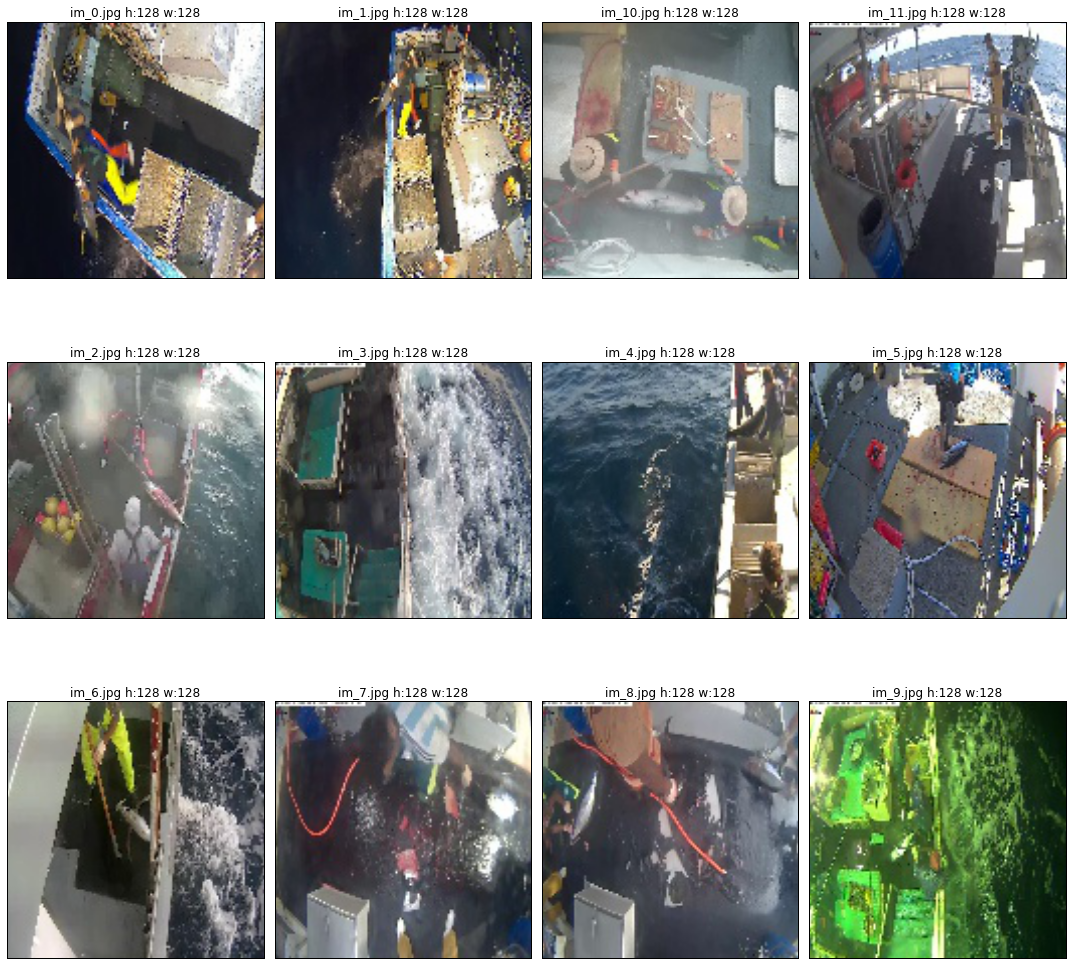

In [53]:
plot_graph(FOLDER_RESIZED,12,4,is_random = False)

In [54]:
from sklearn.cross_validation import train_test_split

In [55]:
%time X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

Wall time: 17.6 s


In [56]:
from sklearn.preprocessing import OneHotEncoder
y_encoded = pd.get_dummies(y)
y_encoded = y_encoded.values
y_encoded

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [57]:
y_encoded.shape

(3777L, 8L)

In [58]:
sys.stderr.writelines('Nb values: %d \n' % len(y_train))

alb_ratio_train = np.count_nonzero(np.asarray(y_train) == 'ALB') / len(y_train)
sys.stderr.writelines('Ratio ALB in train: %f \n' % alb_ratio_train)

alb_ratio_test = np.count_nonzero(np.asarray(y_test) == 'ALB') / len(y_test)
sys.stderr.writelines('Ratio ALB in test: %f \n' % alb_ratio_test)

dol_ratio_train = np.count_nonzero(np.asarray(y_train) == 'DOL') / len(y_train)
sys.stderr.writelines('Ratio DOL in train: %f \n' % dol_ratio_train)

dol_ratio_test = np.count_nonzero(np.asarray(y_test) == 'DOL') / len(y_test)
sys.stderr.writelines('Ratio DOL in test: %f \n' % dol_ratio_test)

Nb values: 3022 
Ratio ALB in train: 0.000000 
Ratio ALB in test: 0.000000 
Ratio DOL in train: 0.000000 
Ratio DOL in test: 0.000000 


In [59]:
shapes = [x.shape for x in X]
pd.Series(shapes).value_counts()

(128, 128, 3)    3777
dtype: int64

## Tensor Flow

In [60]:
#conda install -c conda-forge tensorflow
import tensorflow as tf

ImportError: No module named tensorflow

In [206]:
N_OUTPUT= 8

In [207]:
sess = tf.InteractiveSession()

Constants are initialized when you call tf.constant, and their value can never change. By contrast, variables are not initialized when you call tf.Variable. To initialize all the variables in a TensorFlow program, you must explicitly call a special operation as follows:

# Input

In [208]:
X = tf.placeholder(tf.float32, shape=[128, 128, 3], name="X")
y = tf.placeholder(tf.float32, shape=[None, 8], name="y") #The first dimension of the placeholder is None, meaning we can have any number of rows.

In [209]:
X = tf.reshape(X, [-1, 128, 128, 3])# -1 can also be used to infer the shape(https://www.tensorflow.org/api_docs/python/tf/reshape)

## 1st Convolutional Layer

In [210]:
w_conv1 =  tf.Variable(tf.truncated_normal([5,5,3,64], mean=0.0, stddev=0.1, dtype=tf.float32))

In [211]:
bias_1 = tf.Variable(tf.constant(value=0.1,shape=[64]))

In [212]:
h_conv1 = tf.nn.conv2d(X, w_conv1, strides=[1, 1, 1, 1], padding='SAME') + bias_1 #(128 * 128 * 64)

# 1st Relu

In [213]:
h_relu1 = tf.nn.relu(h_conv1)  #(128 * 128 * 64)

## 1st Pooling

In [214]:
h_pool1 = tf.nn.max_pool(h_relu1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME') #64 * 64 *64

## 2nd Convolutional layer

In [215]:
w_conv2 = tf.Variable(tf.truncated_normal([5, 5, 64, 128], mean=0.0, stddev=0.1, dtype=tf.float32))

In [216]:
bias_2 = tf.Variable(tf.constant(value=0.1,shape=[128]))

In [217]:
h_conv2 = tf.nn.conv2d(h_pool1, w_conv2, strides=[1,1,1,1], padding='SAME') + bias_2 #64 * 64 * 128

## 2nd Relu

In [218]:
h_relu2 = tf.nn.relu(h_conv2)  #64 * 64 * 128

## 2nd Pooling

In [219]:
h_pool2 = tf.nn.max_pool(h_relu2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME') #32 * 32 * 128 

## Densely connected layer

In [220]:
w_fc1 = tf.Variable(tf.truncated_normal([32 * 32 * 128, 1024], mean=0.0, stddev=0.1, dtype=tf.float32))

In [221]:
b_fc1 = tf.Variable(tf.constant(value=0.1, shape=[1024]))

In [222]:
h_pool2_flat = tf.reshape(h_pool2, [-1, 32 * 32 * 128])

In [223]:
h_fc1 = tf.matmul(h_pool2_flat, w_fc1) + b_fc1

## Relu FC

In [224]:
h_fc1_relu = tf.nn.relu(h_fc1)

## Dropout layer

#http://cs231n.github.io/neural-networks-2/#reg

In [225]:
keep_prob  = tf.placeholder(tf.float32, name="keep_prob")

In [226]:
h_dropout = tf.nn.dropout(h_fc1_relu, keep_prob)

## Output layer

In [227]:
w_output = tf.Variable(tf.truncated_normal(shape=[1024,8], mean=0.0, stddev=1.0, dtype=tf.float32))

In [228]:
b_output = tf.Variable(tf.constant(value=0.1,shape=[8]))

In [229]:
y_output = tf.matmul(h_dropout, w_output) + b_output

## Training

In [230]:
#http://stackoverflow.com/questions/34240703/difference-between-tensorflow-tf-nn-softmax-and-tf-nn-softmax-cross-entropy-with

In [231]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_output))

In [232]:
train_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cross_entropy)

In [233]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_output,1))

In [242]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [243]:
sess.run(tf.global_variables_initializer())

In [252]:
batch_x = X_train[:1]
batch_x.shape

(1, 128, 128, 3)

In [245]:
batch_y = y_encoded[0]
batch_y

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [246]:
batch_y.shape

(8,)

In [247]:
batch_y = np.reshape(batch_y, (1,8))
batch_y

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [248]:
batch_y.shape

(1, 8)

In [ ]:
train_step.run(feed_dict={
                          X : batch_x,
                          y : batch_y,
                          keep_prob : 0.5
                         }               
              )